In [1]:
import torch
import numpy as np
import pandas as pd
import data
import tqdm
import autoencoder_resnet_simple
from torchvision.transforms import v2

/home/anirudh/Documents/GSoC/DeepLense/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 32
EPOCHS = 100
LATENT_DIM = 512
LR = 1e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
def transform(image):
    """
    Data augmentation by random rotation, and random scaling between 0.8 to 1.2

    :param image: Image before transform
    :return: Image after transform 
    """
    image = v2.RandomAffine(degrees=(-180,180),scale=(0.8,1.2))(image)
    return image

In [3]:
train_dataset = data.LensingDataset('index.csv','../dataset/train/',
                                    transform=transform)
test_dataset = data.LensingDataset('index.csv','../dataset/val/',
                                   transform=transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               shuffle=True,
                                               batch_size=BATCH_SIZE,
                                               num_workers=15)
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              shuffle=True,
                                              batch_size=BATCH_SIZE,
                                              num_workers=15)

In [5]:
model = autoencoder_resnet_simple.AutoEncoder().to(device)


accs = []
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(params=model.parameters(),lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt,'min',patience=2,factor=0.1)
best_val_loss = np.inf
best_weights = None
history = {'val_loss':[], 'loss':[]}
for epoch in range(EPOCHS):
    losses = []
    model.train()
    for i,(x,y) in enumerate(tqdm.tqdm(train_dataloader, desc=f"Training epoch {epoch}")):
        (x, y) = (x.float().to(device), y.to(device))
        out_x = model(x)
        loss = loss_fn(out_x,x)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Training at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    history['loss'].append(np.mean(losses))
    train_loss = np.mean(losses)
    model.eval()
    losses = []
    for i,(x,y) in enumerate(tqdm.tqdm(test_dataloader, desc=f"Validation epoch {epoch}")):
        (x, y) = (x.float().to(device), y.to(device))
        out_x = model(x)
        val_loss = loss_fn(out_x,x)
        losses.append(float(val_loss))
    print(f"Validation at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    if best_val_loss > np.mean(losses):
        best_val_loss = np.mean(losses)
        best_weights = model.state_dict()
    history['val_loss'].append(np.mean(losses))
    scheduler.step(train_loss)
model.load_state_dict(best_weights)

Training epoch 0: 100%|██████████| 938/938 [01:00<00:00, 15.58it/s]


Training at epoch 1/100: 0.07288801001964697 at LR=0.0001


Validation epoch 0: 100%|██████████| 235/235 [00:05<00:00, 43.44it/s]


Validation at epoch 1/100: 0.09874329314111395 at LR=0.0001


Training epoch 1: 100%|██████████| 938/938 [00:58<00:00, 16.10it/s]


Training at epoch 2/100: 0.013876043828025555 at LR=0.0001


Validation epoch 1: 100%|██████████| 235/235 [00:05<00:00, 43.28it/s]


Validation at epoch 2/100: 0.02735591855771998 at LR=0.0001


Training epoch 2: 100%|██████████| 938/938 [00:58<00:00, 16.07it/s]


Training at epoch 3/100: 0.006579309831242333 at LR=0.0001


Validation epoch 2: 100%|██████████| 235/235 [00:05<00:00, 43.28it/s]


Validation at epoch 3/100: 0.0185564328500248 at LR=0.0001


Training epoch 3: 100%|██████████| 938/938 [00:58<00:00, 16.03it/s]


Training at epoch 4/100: 0.0024125408947165967 at LR=0.0001


Validation epoch 3: 100%|██████████| 235/235 [00:05<00:00, 42.47it/s]


Validation at epoch 4/100: 0.015050789515705819 at LR=0.0001


Training epoch 4: 100%|██████████| 938/938 [00:58<00:00, 16.01it/s]


Training at epoch 5/100: 0.0015123149196156608 at LR=0.0001


Validation epoch 4: 100%|██████████| 235/235 [00:05<00:00, 44.00it/s]


Validation at epoch 5/100: 0.012918825340556337 at LR=0.0001


Training epoch 5: 100%|██████████| 938/938 [00:58<00:00, 16.14it/s]


Training at epoch 6/100: 0.001089254999024444 at LR=0.0001


Validation epoch 5: 100%|██████████| 235/235 [00:05<00:00, 44.02it/s]


Validation at epoch 6/100: 0.012297268877638148 at LR=0.0001


Training epoch 6: 100%|██████████| 938/938 [00:58<00:00, 16.05it/s]


Training at epoch 7/100: 0.0008637855248426451 at LR=0.0001


Validation epoch 6: 100%|██████████| 235/235 [00:05<00:00, 43.93it/s]


Validation at epoch 7/100: 0.01199455719361914 at LR=0.0001


Training epoch 7: 100%|██████████| 938/938 [00:58<00:00, 16.05it/s]


Training at epoch 8/100: 0.0006921184885286803 at LR=0.0001


Validation epoch 7: 100%|██████████| 235/235 [00:05<00:00, 43.78it/s]


Validation at epoch 8/100: 0.012039827757534828 at LR=0.0001


Training epoch 8: 100%|██████████| 938/938 [00:58<00:00, 16.08it/s]


Training at epoch 9/100: 0.0006178407463804086 at LR=0.0001


Validation epoch 8: 100%|██████████| 235/235 [00:05<00:00, 43.88it/s]


Validation at epoch 9/100: 0.010556891505071457 at LR=0.0001


Training epoch 9: 100%|██████████| 938/938 [00:58<00:00, 16.08it/s]


Training at epoch 10/100: 0.0005283453593292196 at LR=0.0001


Validation epoch 9: 100%|██████████| 235/235 [00:05<00:00, 43.80it/s]


Validation at epoch 10/100: 0.011550034531094926 at LR=0.0001


Training epoch 10: 100%|██████████| 938/938 [00:58<00:00, 16.08it/s]


Training at epoch 11/100: 0.000489674035556811 at LR=0.0001


Validation epoch 10: 100%|██████████| 235/235 [00:05<00:00, 44.10it/s]


Validation at epoch 11/100: 0.010834751155306684 at LR=0.0001


Training epoch 11: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 12/100: 0.00044014362103518236 at LR=0.0001


Validation epoch 11: 100%|██████████| 235/235 [00:05<00:00, 43.36it/s]


Validation at epoch 12/100: 0.010388872189883222 at LR=0.0001


Training epoch 12: 100%|██████████| 938/938 [00:58<00:00, 16.01it/s]


Training at epoch 13/100: 0.0004181365656511568 at LR=0.0001


Validation epoch 12: 100%|██████████| 235/235 [00:05<00:00, 43.06it/s]


Validation at epoch 13/100: 0.009740631936236898 at LR=0.0001


Training epoch 13: 100%|██████████| 938/938 [00:58<00:00, 15.97it/s]


Training at epoch 14/100: 0.00038906004479545147 at LR=0.0001


Validation epoch 13: 100%|██████████| 235/235 [00:05<00:00, 42.83it/s]


Validation at epoch 14/100: 0.010226339616991103 at LR=0.0001


Training epoch 14: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 15/100: 0.000381190274902401 at LR=0.0001


Validation epoch 14: 100%|██████████| 235/235 [00:05<00:00, 43.16it/s]


Validation at epoch 15/100: 0.009363698075584908 at LR=0.0001


Training epoch 15: 100%|██████████| 938/938 [00:58<00:00, 16.05it/s]


Training at epoch 16/100: 0.0003621426059369014 at LR=0.0001


Validation epoch 15: 100%|██████████| 235/235 [00:05<00:00, 42.95it/s]


Validation at epoch 16/100: 0.009348989939911569 at LR=0.0001


Training epoch 16: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 17/100: 0.0003532691539311384 at LR=0.0001


Validation epoch 16: 100%|██████████| 235/235 [00:05<00:00, 43.42it/s]


Validation at epoch 17/100: 0.008797207363742463 at LR=0.0001


Training epoch 17: 100%|██████████| 938/938 [00:58<00:00, 16.05it/s]


Training at epoch 18/100: 0.0003395816602588776 at LR=0.0001


Validation epoch 17: 100%|██████████| 235/235 [00:05<00:00, 42.81it/s]


Validation at epoch 18/100: 0.008904524595337979 at LR=0.0001


Training epoch 18: 100%|██████████| 938/938 [00:58<00:00, 16.03it/s]


Training at epoch 19/100: 0.00033073389461747547 at LR=0.0001


Validation epoch 18: 100%|██████████| 235/235 [00:05<00:00, 43.23it/s]


Validation at epoch 19/100: 0.008357616771567376 at LR=0.0001


Training epoch 19: 100%|██████████| 938/938 [00:58<00:00, 16.03it/s]


Training at epoch 20/100: 0.0003210325198342849 at LR=0.0001


Validation epoch 19: 100%|██████████| 235/235 [00:05<00:00, 43.09it/s]


Validation at epoch 20/100: 0.008531801991085422 at LR=0.0001


Training epoch 20: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 21/100: 0.0003169987734730121 at LR=0.0001


Validation epoch 20: 100%|██████████| 235/235 [00:05<00:00, 43.56it/s]


Validation at epoch 21/100: 0.008412653401969596 at LR=0.0001


Training epoch 21: 100%|██████████| 938/938 [00:58<00:00, 16.05it/s]


Training at epoch 22/100: 0.00030555639377567294 at LR=0.0001


Validation epoch 21: 100%|██████████| 235/235 [00:05<00:00, 42.63it/s]


Validation at epoch 22/100: 0.008231759148630056 at LR=0.0001


Training epoch 22: 100%|██████████| 938/938 [00:58<00:00, 16.04it/s]


Training at epoch 23/100: 0.0003002290373641019 at LR=0.0001


Validation epoch 22: 100%|██████████| 235/235 [00:05<00:00, 43.21it/s]


Validation at epoch 23/100: 0.008324112342868714 at LR=0.0001


Training epoch 23: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 24/100: 0.0003002229340457375 at LR=0.0001


Validation epoch 23: 100%|██████████| 235/235 [00:05<00:00, 43.54it/s]


Validation at epoch 24/100: 0.007858598319456933 at LR=0.0001


Training epoch 24: 100%|██████████| 938/938 [00:58<00:00, 16.03it/s]


Training at epoch 25/100: 0.0002803178671192674 at LR=0.0001


Validation epoch 24: 100%|██████████| 235/235 [00:05<00:00, 42.94it/s]


Validation at epoch 25/100: 0.00794984953913917 at LR=0.0001


Training epoch 25: 100%|██████████| 938/938 [00:58<00:00, 16.07it/s]


Training at epoch 26/100: 0.00028811615659296314 at LR=0.0001


Validation epoch 25: 100%|██████████| 235/235 [00:05<00:00, 43.40it/s]


Validation at epoch 26/100: 0.0078830802159265 at LR=0.0001


Training epoch 26: 100%|██████████| 938/938 [00:58<00:00, 16.05it/s]


Training at epoch 27/100: 0.0002828343048425409 at LR=0.0001


Validation epoch 26: 100%|██████████| 235/235 [00:05<00:00, 43.31it/s]


Validation at epoch 27/100: 0.007576023103629655 at LR=0.0001


Training epoch 27: 100%|██████████| 938/938 [00:58<00:00, 16.04it/s]


Training at epoch 28/100: 0.00028479367671191874 at LR=0.0001


Validation epoch 27: 100%|██████████| 235/235 [00:05<00:00, 43.37it/s]


Validation at epoch 28/100: 0.007712080402973484 at LR=0.0001


Training epoch 28: 100%|██████████| 938/938 [00:58<00:00, 16.07it/s]


Training at epoch 29/100: 0.00025383718610892116 at LR=1e-05


Validation epoch 28: 100%|██████████| 235/235 [00:05<00:00, 42.76it/s]


Validation at epoch 29/100: 0.00770255741762354 at LR=1e-05


Training epoch 29: 100%|██████████| 938/938 [00:58<00:00, 16.04it/s]


Training at epoch 30/100: 0.00024584793082777477 at LR=1e-05


Validation epoch 29: 100%|██████████| 235/235 [00:05<00:00, 43.13it/s]


Validation at epoch 30/100: 0.007712564375647839 at LR=1e-05


Training epoch 30: 100%|██████████| 938/938 [00:58<00:00, 16.01it/s]


Training at epoch 31/100: 0.0002442655125927023 at LR=1e-05


Validation epoch 30: 100%|██████████| 235/235 [00:05<00:00, 43.01it/s]


Validation at epoch 31/100: 0.007706148179366867 at LR=1e-05


Training epoch 31: 100%|██████████| 938/938 [00:58<00:00, 16.04it/s]


Training at epoch 32/100: 0.0002452714263920986 at LR=1e-05


Validation epoch 31: 100%|██████████| 235/235 [00:05<00:00, 43.24it/s]


Validation at epoch 32/100: 0.007688222161712164 at LR=1e-05


Training epoch 32: 100%|██████████| 938/938 [00:58<00:00, 16.01it/s]


Training at epoch 33/100: 0.00024439357324758534 at LR=1e-05


Validation epoch 32: 100%|██████████| 235/235 [00:05<00:00, 43.02it/s]


Validation at epoch 33/100: 0.0077942032565144785 at LR=1e-05


Training epoch 33: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 34/100: 0.00024339429428378966 at LR=1e-05


Validation epoch 33: 100%|██████████| 235/235 [00:05<00:00, 43.46it/s]


Validation at epoch 34/100: 0.007712110415338836 at LR=1e-05


Training epoch 34: 100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


Training at epoch 35/100: 0.00024447584904713936 at LR=1e-05


Validation epoch 34: 100%|██████████| 235/235 [00:05<00:00, 43.30it/s]


Validation at epoch 35/100: 0.007736640700951536 at LR=1e-05


Training epoch 35: 100%|██████████| 938/938 [00:58<00:00, 16.02it/s]


Training at epoch 36/100: 0.00024309284281174738 at LR=1e-05


Validation epoch 35: 100%|██████████| 235/235 [00:05<00:00, 43.06it/s]


Validation at epoch 36/100: 0.007713528534278591 at LR=1e-05


Training epoch 36: 100%|██████████| 938/938 [00:58<00:00, 15.96it/s]


Training at epoch 37/100: 0.0002425015053823779 at LR=1e-05


Validation epoch 36: 100%|██████████| 235/235 [00:05<00:00, 43.15it/s]


Validation at epoch 37/100: 0.007510900768907146 at LR=1e-05


Training epoch 37: 100%|██████████| 938/938 [00:58<00:00, 16.07it/s]


Training at epoch 38/100: 0.00024197642626709985 at LR=1e-05


Validation epoch 37: 100%|██████████| 235/235 [00:05<00:00, 43.21it/s]


Validation at epoch 38/100: 0.00773338618034378 at LR=1e-05


Training epoch 38: 100%|██████████| 938/938 [00:58<00:00, 15.99it/s]


Training at epoch 39/100: 0.00023956240197558747 at LR=1e-05


Validation epoch 38: 100%|██████████| 235/235 [00:05<00:00, 43.14it/s]


Validation at epoch 39/100: 0.007745063487202563 at LR=1e-05


Training epoch 39: 100%|██████████| 938/938 [00:58<00:00, 16.02it/s]


Training at epoch 40/100: 0.00023922391465370124 at LR=1e-05


Validation epoch 39: 100%|██████████| 235/235 [00:05<00:00, 43.23it/s]


Validation at epoch 40/100: 0.007739596116415998 at LR=1e-05


Training epoch 40: 100%|██████████| 938/938 [00:58<00:00, 16.00it/s]


Training at epoch 41/100: 0.0002405192855322835 at LR=1e-05


Validation epoch 40: 100%|██████████| 235/235 [00:05<00:00, 43.22it/s]


Validation at epoch 41/100: 0.007746510552440552 at LR=1e-05


Training epoch 41: 100%|██████████| 938/938 [00:58<00:00, 16.00it/s]


Training at epoch 42/100: 0.00023960512120158536 at LR=1e-05


Validation epoch 41: 100%|██████████| 235/235 [00:05<00:00, 43.16it/s]


Validation at epoch 42/100: 0.007887106101484374 at LR=1e-05


Training epoch 42: 100%|██████████| 938/938 [00:58<00:00, 16.02it/s]


Training at epoch 43/100: 0.0002371535636887981 at LR=1e-05


Validation epoch 42: 100%|██████████| 235/235 [00:05<00:00, 43.23it/s]


Validation at epoch 43/100: 0.007703979018124494 at LR=1e-05


Training epoch 43: 100%|██████████| 938/938 [00:58<00:00, 16.04it/s]


Training at epoch 44/100: 0.00023739329068365493 at LR=1e-05


Validation epoch 43: 100%|██████████| 235/235 [00:05<00:00, 43.16it/s]


Validation at epoch 44/100: 0.007635651493167623 at LR=1e-05


Training epoch 44: 100%|██████████| 938/938 [00:58<00:00, 16.00it/s]


Training at epoch 45/100: 0.00023433827888295016 at LR=1e-05


Validation epoch 44: 100%|██████████| 235/235 [00:05<00:00, 43.03it/s]


Validation at epoch 45/100: 0.00751374344083857 at LR=1e-05


Training epoch 45: 100%|██████████| 938/938 [00:58<00:00, 16.02it/s]


Training at epoch 46/100: 0.00023591455524794256 at LR=1e-05


Validation epoch 45: 100%|██████████| 235/235 [00:05<00:00, 42.93it/s]


Validation at epoch 46/100: 0.007642589136958122 at LR=1e-05


Training epoch 46: 100%|██████████| 938/938 [00:58<00:00, 15.97it/s]


Training at epoch 47/100: 0.00023383351954703988 at LR=1e-05


Validation epoch 46: 100%|██████████| 235/235 [00:05<00:00, 42.76it/s]


Validation at epoch 47/100: 0.007716107350635402 at LR=1e-05


Training epoch 47: 100%|██████████| 938/938 [00:58<00:00, 15.96it/s]


Training at epoch 48/100: 0.0002350565166924266 at LR=1e-05


Validation epoch 47: 100%|██████████| 235/235 [00:05<00:00, 43.21it/s]


Validation at epoch 48/100: 0.007722106659190452 at LR=1e-05


Training epoch 48: 100%|██████████| 938/938 [00:58<00:00, 16.02it/s]


Training at epoch 49/100: 0.00023304052479470322 at LR=1e-05


Validation epoch 48: 100%|██████████| 235/235 [00:05<00:00, 43.15it/s]


Validation at epoch 49/100: 0.00783972314539108 at LR=1e-05


Training epoch 49: 100%|██████████| 938/938 [00:58<00:00, 15.99it/s]


Training at epoch 50/100: 0.0002338553144686373 at LR=1e-05


Validation epoch 49: 100%|██████████| 235/235 [00:05<00:00, 43.09it/s]


Validation at epoch 50/100: 0.0076667864093596634 at LR=1e-05


Training epoch 50: 100%|██████████| 938/938 [00:58<00:00, 16.03it/s]


Training at epoch 51/100: 0.0002335917877543694 at LR=1e-05


Validation epoch 50: 100%|██████████| 235/235 [00:05<00:00, 43.09it/s]


Validation at epoch 51/100: 0.007691979796645489 at LR=1e-05


Training epoch 51: 100%|██████████| 938/938 [00:58<00:00, 15.98it/s]


Training at epoch 52/100: 0.00023123036415292832 at LR=1e-05


Validation epoch 51: 100%|██████████| 235/235 [00:05<00:00, 43.02it/s]


Validation at epoch 52/100: 0.0076738757794683286 at LR=1e-05


Training epoch 52:  70%|███████   | 661/938 [00:41<00:17, 15.85it/s]


In [7]:
torch.save(model.state_dict(), 'autoencoder_simple_state_%d.pt'%LATENT_DIM)


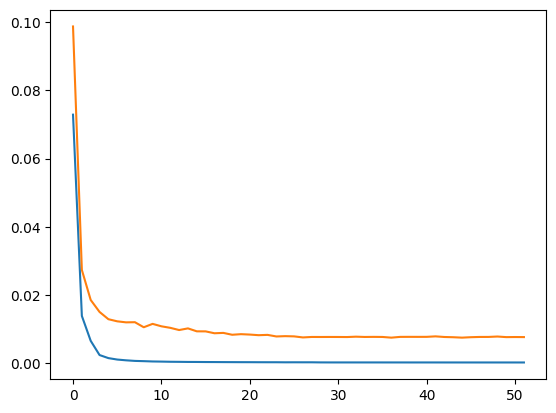

In [6]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.plot(history['val_loss'])